Object Qualifiers

- Location  : street sign, tennis shoe
- Part      : bike seat, dog nose
- Context   : projector screen, wedding cake
- State     : sliced apple, buzz hair
- Function  : school bus


> "Abstracting Visual World" (e.g. Color: ball vs snowball)

In [1]:
import numpy as np
from PIL import Image
from glob import glob
from tqdm import tqdm
from os.path import join as osj
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from collections import OrderedDict, Counter
from utils import read_json, save_json
from constants import IGNORE_IMAGES

DATA_DIR = '../../../Datasets/Visual_Genome'

In [3]:
data = read_json('./temp/region_graphs_10k.json')

In [3]:
def _path2id(p: str) -> int:
    p = p.split('/')[-1]
    p = p.split('.')[0]
    p = int(p)
    return p


im_paths = glob(osj(DATA_DIR, 'images_1', '*.jpg'))
im_paths += glob(osj(DATA_DIR, 'images_2', '*.jpg'))

id2paths = {_path2id(path): path for path in im_paths
            if path.split('/')[-1] not in IGNORE_IMAGES}


def _annotate(ax, box: list, label: str, color='red'):
    x, y, w, h = box
    # text
    ax.text(x, y - 5, label, fontsize=12, color='black', bbox={'facecolor': 'white', 'alpha': 0.4})
    # bbox
    rect = Rectangle((x, y), w, h, edgecolor=color, facecolor='none')
    ax.add_patch(rect)


def plot_img_regions(d: dict, show='phrase', num_regs=20):
    im_id = d['image_id']

    img = Image.open(id2paths[im_id])

    plt.figure(figsize=(14, 14))
    plt.imshow(img)

    # reference
    axes = plt.gca()

    for r in d['regions'][:num_regs]:
        if show == 'phrase':
            text = r['phrase']
        else:
            text = ', '.join(x['name'] for x in r['objects'])
        bbox = [r['x'], r['y'], r['width'], r['height']]

        _annotate(axes, bbox, text)

    plt.show()


In [ ]:
for _d in data[:5]:
    plot_img_regions(_d, show='phrase', num_regs=20)
    plot_img_regions(_d, show='objs', num_regs=20)


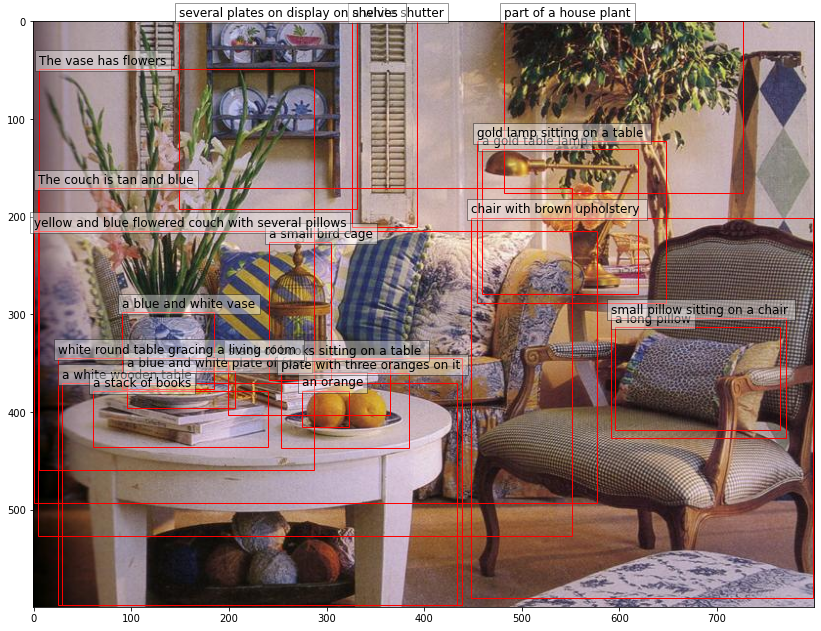

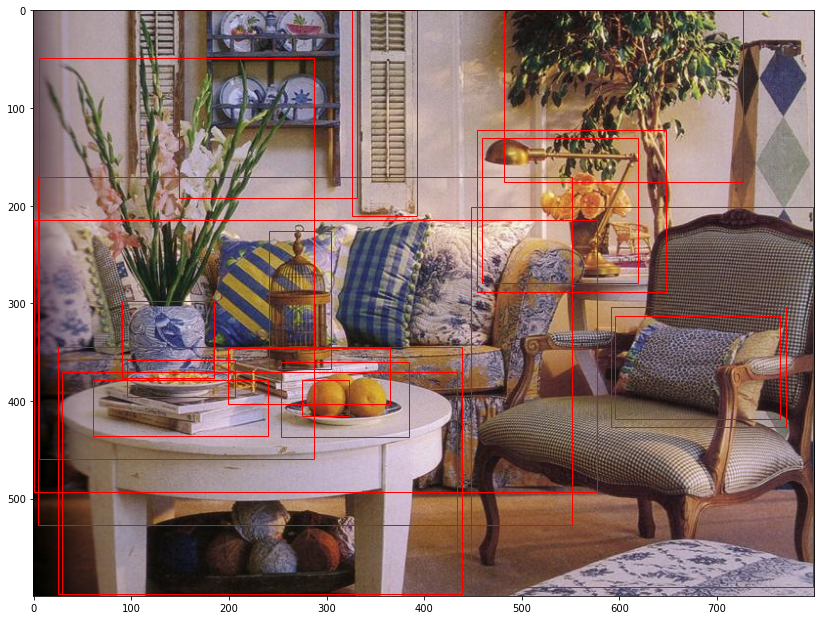

In [4]:
N = 20

_d = data[550]
_im_id = _d['image_id']

plot_img_regions(_d, show='phrase', num_regs=N)
plot_img_regions(_d, show='objs', num_regs=N)


In [ ]:
def _print(l: list):
    for e in l:
        print(e)
    print()


for _r in _d['regions'][:N]:
    print(_r['phrase'], '\n')

    print('Objects:')
    _print(_r['objects'])

    print('Synsets:')
    _print(_r['synsets'])

    print('Relations:')
    _print(_r['relationships'])

    print('\n--------------------\n')


## Extract Objects

#### Use POS tags over Region captions and group by Synsets.

In [2]:
data_pos = read_json(osj(DATA_DIR, 'pos_tags', 'p_20k.json'))


In [4]:
_d = data_pos[0]

for sent in _d['pos_tags']:
    sent = ' '.join([f'{w}({t})' for w, t in sent.items()])
    print(sent, '\n')


the(DT) clock(NN) is(VBZ) green(JJ) in(IN) colour(NN) 

shade(NN) is(VBZ) along(IN) the(DT) street(NN) 

man(NN) is(VBZ) wearing(VBG) sneakers(NNS) 

cars(NNS) headlights(NNS) are(VBP) off(RB) 

bikes(NNS) are(VBP) parked(VBN) at(IN) the(DT) far(JJ) edge(NN) 

a(DT) sign(NN) on(IN) the(DT) facade(NN) of(IN) building(NN) 

a(DT) tree(NN) trunk(NN) on(IN) the(DT) sidewalk(NN) 

a(DT) man(NN) in(IN) red(JJ) shirt(NN) 

a(DT) brick(NN) sidewalk(NN) beside(IN) the(DT) street(NN) 

the(DT) back(NN) of(IN) a(DT) white(JJ) car(NN) 

a(DT) man(NN) is(VBZ) wearing(VBG) glasses(NNS) 

a(DT) parking(NN) meter(NN) is(VBZ) on(IN) the(DT) sidewalk(NN) 

bicycles(NNS) are(VBP) in(IN) the(DT) background(NN) 

a(DT) man(NN) wears(VBZ) grey(JJ) shoes(NNS) 

a(DT) man(NN) has(VBZ) brown(JJ) shoes(NNS) on(IN) 

a(DT) man(NN) dressed(VBN) in(IN) red(JJ) shirt(NN) and(CC) black(JJ) pants.(NNS) 

a(DT) man(NN) wearing(VBG) gray(JJ) jacket(NN) and(CC) pants.(NNS) 

a(DT) bicycle(NN) parked(VBN) on(IN) the(DT) 

In [9]:
from models import POSTagger

pos_tagger = POSTagger()

_d = data[602]

for _r in _d['regions']:
    txt = _r['phrase'].lower()
    tags = ' '.join([_['word'] + "(" + _['tag'] + ")" for _ in pos_tagger(txt)])

    print(tags, '\n\n')


2022-06-04 23:14:40,786 loading file /home/axe/.flair/models/pos-english/a9a73f6cd878edce8a0fa518db76f441f1cc49c2525b2b4557af278ec2f0659e.121306ea62993d04cd1978398b68396931a39eb47754c8a06a87f325ea70ac63
2022-06-04 23:14:40,941 SequenceTagger predicts: Dictionary with 53 tags: <unk>, O, UH, ,, VBD, PRP, VB, PRP$, NN, RB, ., DT, JJ, VBP, VBG, IN, CD, NNS, NNP, WRB, VBZ, WDT, CC, TO, MD, VBN, WP, :, RP, EX, JJR, FW, XX, HYPH, POS, RBR, JJS, PDT, NNPS, RBS, AFX, WP$, -LRB-, -RRB-, ``, '', LS, $, SYM, ADD
person(NN) walks(VBZ) on(IN) sidewalk(NN) 


sidewalk(NN) is(VBZ) dark(JJ) grey(JJ) 


grey(JJ) and(CC) wet(JJ) sidewalk(NN) 


row(NN) of(IN) bushes(NNS) near(IN) road(NN) 


bushes(NNS) in(IN) grey(JJ) pots(NNS) 


clear(JJ) glass(NN) windows(NNS) at(IN) store(NN) 


grey(JJ) and(CC) white(JJ) sky(NN) 


narrow(JJ) opening(NN) of(IN) sky(NN) 


road(NN) is(VBZ) dark(JJ) grey(JJ) 


grey(JJ) and(CC) wet(JJ) road(NN) 


a(DT) row(NN) of(IN) windows(NNS) 


this(DT) is(VBZ) a(DT) person(NN)

In [12]:
from collections import Counter

adj = []
noun = []

for _d in tqdm(data[:2000]):
    for _r in _d['regions']:
        tags = pos_tagger(_r['phrase'].lower())

        adj += [t['word'] for t in tags if t['tag'] == 'JJ']
        noun += [t['word'] for t in tags if t['tag'] in ['NN', 'NNS', 'NNP', 'NNPS']]

adj = Counter(adj)
noun = Counter(noun)

def sort_dict(d, **kwargs):
    d = sorted(d.items(), **kwargs)
    d = OrderedDict(d)
    return dict(d)
# from utils import sort_dict

adj = sort_dict(adj, key=lambda x: x[1], reverse=True)
noun = sort_dict(noun, key=lambda x: x[1], reverse=True)

100%|██████████| 2000/2000 [24:22<00:00,  1.37it/s]


In [14]:
adj


{'white': 13464,
 'black': 7708,
 'red': 5210,
 'blue': 4760,
 'green': 4042,
 'brown': 2843,
 'large': 2465,
 'yellow': 2448,
 'small': 1949,
 'wooden': 1833,
 'grey': 1668,
 'tall': 1391,
 'gray': 1268,
 'silver': 1165,
 'light': 1119,
 'dark': 1109,
 'clear': 729,
 'long': 675,
 'pink': 611,
 'next': 529,
 'colored': 478,
 'front': 444,
 'open': 390,
 'purple': 368,
 'empty': 341,
 'round': 326,
 'plastic': 324,
 'concrete': 313,
 'many': 296,
 'beige': 289,
 'short': 285,
 'square': 283,
 'orange': 257,
 'old': 252,
 'bright': 243,
 'big': 227,
 'right': 219,
 'left': 214,
 'several': 206,
 'striped': 202,
 'back': 188,
 'parked': 185,
 'paved': 177,
 'full': 173,
 'electrical': 165,
 'rear': 154,
 'decorative': 148,
 'gold': 146,
 'top': 142,
 'cloudy': 139,
 'colorful': 132,
 'bare': 130,
 'young': 121,
 'shiny': 120,
 'outdoor': 117,
 'blonde': 116,
 'floral': 112,
 'other': 111,
 'tan': 107,
 'double': 105,
 'rectangular': 104,
 'thin': 102,
 'white.': 101,
 'little': 96,
 'ame